In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

bostonデータを使って、回帰分析を行う

「目的」説明変数をなるべく減らし、sklearnを使ってモデルを構築していく

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# CRIM	人口当たりの犯罪発生数
# ZN	25,000平方フィート以上の住居区画の占める割合
# INDUS	小売業以外の商業が占める面積の割合
# CHAS	チャールズ川の周辺かどうか
# NOX	窒素酸化物の濃度
# RM	住居の平均部屋数
# AGE	1940年より前に建てられた物件の割合
# DIS	5つのボストン市の雇用施設からの距離に基づく値
# RAD	環状高速道路へのアクセスしやすさ
# TAX	$10,000 ドルあたりの不動産税率の総計
# PTRATIO	町毎の児童と教師の比率
# B	町毎の黒人の比率に基づく値
# LSTAT	給与の低い職業に従事する人口の割合

In [15]:
X['y'] = y
X.head()
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
y          float64
dtype: object

In [35]:
X_corr = X.corr().y
X_corr

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
y          1.000000
Name: y, dtype: float64

In [29]:
X_corr_06 = {}

for i, num in enumerate(X_corr):
    if num >= 0.6:
        X_corr_06[i] = num

In [30]:
X_corr_06

{5: 0.6953599470715389, 13: 1.0}

今行ったこと

1. それぞれの相関係数を求める
2. その中から、[y]（目的変数）の相関を取り出し、その中で関係性（0.6以上)がある値を取り出す
3. 相関係数は相関関係がわかるが、因果関係はわからないため、一般常識と照らし合わせ考える

In [34]:
X.columns[5]

'RM'

<p>[RM]は住居の平均部屋数であり</p>
つまり、「住居の平均部屋数が多いほど、金額が高くなること」言える
<p>豪邸と呼ばれる家は確かに金額は高く、部屋数は多い！（当たり前といえば、当たり前だが・・・）</p>
だから、これは「使える指標」である


In [36]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target



In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [41]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(X_train[['RM']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lr.coef_, lr.intercept_
#coef_ 係数
#intercept_ 切片

(array([9.31132806]), -35.994348978183496)

In [85]:
y_pred = lr.predict(X_test[['RM']])
y_pred.shape

(152,)

In [91]:
#決定係数　＝＞　モデルの当てはまりの良さ
from sklearn.metrics import r2_score, mean_squared_error


mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(47.03304747975518, 0.43514364832115193)

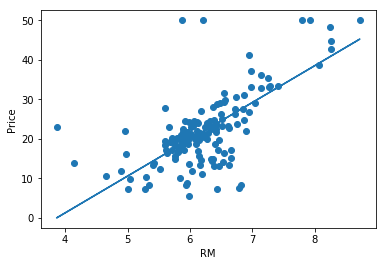

In [89]:
plt.scatter(X_test[['RM']], y_test)
plt.xlabel('RM')
plt.ylabel('Price')

plt.plot(X_test[['RM']], y_pred)

sklearnを使って単回帰分析をした結果
<p>係数　9.311</p>
<p>切片　-35.994　　の結果となった</p>

<p>また、予想した値がどのくらい当たっているのかがわかる決定係数は 0.435である => 単回帰では高いとよいモデルである</p>
<p>また、予想した値と実際の値がどのくらい離れているのかがわかる平均二乗誤差は 47.033　=> 小さいほどよいモデルである</p>


このことから、決定係数がまだ低いため、改善する必要性がある
まだ、使ってない変数があるため、重回帰分析を使うとよいモデルができるかもしれない

In [99]:
#重回帰分析をする（変数は３つ以下）
#前の相関を求めた時に、[LSTAT]も-0.7と強い相関があったため、加えてみる

lr.fit(X_train[['RM','LSTAT']], y_train)


lr.coef_, lr.intercept_

(array([ 5.27350522, -0.6418309 ]), -2.5372467189439867)

In [102]:
y_pred = lr.predict(X_test[['RM', 'LSTAT']])
y_pred

(152,)

In [103]:
r2_score(y_test, y_pred)

0.6069792285352371

In [104]:
mean_squared_error(y_test, y_pred)

32.72507169281496

前の相関係数で高かった'LSTAT'を加えた結果、決定係数が上がり、平均二乗誤差が小さくなったため、よくなったと言える

In [105]:
#最後に、全てを説明変数に入れるとどうなるのか

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
lr.coef_, lr.intercept_

(array([-1.19858618e-01,  4.44233009e-02,  1.18612465e-02,  2.51295058e+00,
        -1.62710374e+01,  3.84909910e+00, -9.85471557e-03, -1.50002715e+00,
         2.41507916e-01, -1.10671867e-02, -1.01897720e+00,  6.95273216e-03,
        -4.88110587e-01]), 37.992592770345254)

In [112]:
for i, num in enumerate(lr.coef_):
    print('{}: {}'.format(X.columns[i], num))

CRIM: -0.11985861810901743
ZN: 0.0444233008744117
INDUS: 0.011861246471184654
CHAS: 2.512950577593002
NOX: -16.271037374661304
RM: 3.8490991045908496
AGE: -0.009854715572928448
DIS: -1.5000271489065686
RAD: 0.24150791589372758
TAX: -0.011067186676572313
PTRATIO: -1.0189771998914503
B: 0.006952732155918444
LSTAT: -0.488110586827393


In [114]:
y_pred = lr.predict(X_test)
y_pred

array([24.93551831, 23.75668597, 29.3364008 , 11.99898444, 21.37583999,
       19.19718511, 20.57022126, 21.2138302 , 19.05187659, 20.31028442,
        5.47685057, 16.88415507, 17.13177611,  5.41132187, 40.2160287 ,
       32.30923608, 22.46445111, 36.50566714, 31.03913253, 23.17552674,
       24.75105205, 24.51122436, 20.65675756, 30.45679279, 22.33344401,
       10.18647997, 17.44394817, 18.24663845, 35.62978156, 20.81890427,
       18.26969192, 17.71558071, 19.34036094, 23.62642525, 28.98283423,
       19.43835179, 11.14022634, 24.82272051, 18.00566388, 15.57161273,
       26.2207858 , 20.81349155, 22.17395321, 15.48276713, 22.6264291 ,
       24.89397648, 19.75674027, 23.03741163,  9.84032063, 24.36186515,
       21.43835984, 17.61122699, 24.39248313, 29.93655984, 13.55766168,
       21.53449652, 20.53870439, 15.03422398, 14.34404261, 22.12289936,
       17.07752265, 21.54237223, 32.96641318, 31.37158339, 17.79556174,
       32.75501672, 18.72716141, 19.20885247, 19.3875019 , 23.08

In [115]:
r2_score(y_test, y_pred)

0.6735280865347231

In [116]:
mean_squared_error(y_test, y_pred)

27.183847647603407

全てを説明変数に入れた結果
決定係数は0.674
平均二乗誤差は27.184

このことから、全てを説明変数に入れることで良いモデルができるということがわかった
